In [162]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
import numpy as np

In [164]:
import pandas as pd

In [165]:
import matplotlib.pyplot as pl

In [166]:
data=pd.read_csv('data\emails.csv')

In [167]:
data.head()  #"1" represents spam, while "0" represents not spam.

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [168]:
data.shape

(5728, 2)

In [169]:
data.drop_duplicates(inplace=True)

In [170]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [171]:
import seaborn as sn

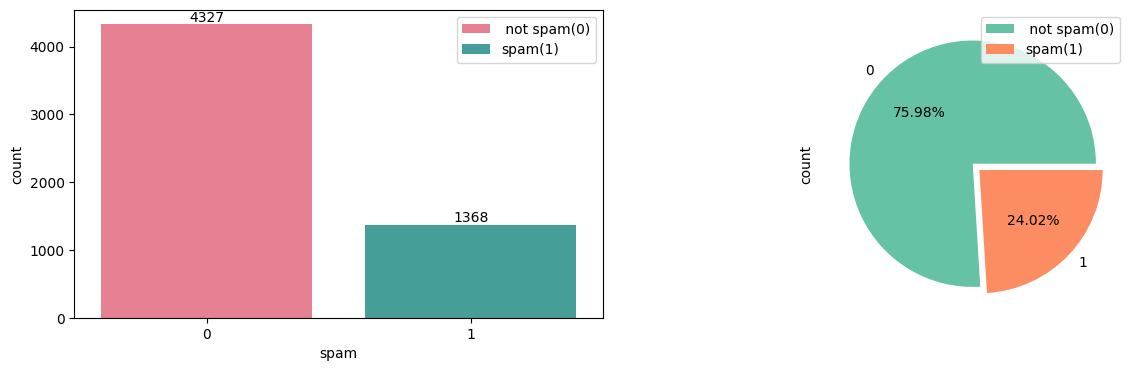

In [172]:
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
p=sn.countplot(data=data,x=data['spam'],palette='husl')
for i in p.containers:
 p.bar_label(i)
pl.legend(labels=[' not spam(0)','spam(1)'])
pl.subplot(1,2,2)
data['spam'].value_counts().plot(kind='pie',autopct="%.2f%%",explode=[0.,.075],colors=['#66c2a5', '#fc8d62'] )
pl.legend(labels=[' not spam(0)','spam(1)'],loc='upper right')
pl.show()

class is not balenced.

In [173]:
data['length']=data['text'].apply(len)

In [174]:
data.head(2)

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598


In [175]:
import spacy

In [176]:
def spl(x):
    count=0
    # Define the delimiters you want to include
    delimiters = ['.', '!', '?']
    for i in x:
        for j in  delimiters:
            if i==j:
                count=count+1
    
    return count

In [177]:
data['sentences']=data['text'].apply(spl)

In [178]:
data.head()

,text,spam,length,sentences
0,Subject: naturally irresistible your corporate...,1,1484,10
1,Subject: the stock trading gunslinger fanny i...,1,598,0
2,Subject: unbelievable new homes made easy im ...,1,448,3
3,Subject: 4 color printing special request add...,1,500,5
4,"Subject: do not have money , get software cds ...",1,235,9


In [179]:

data['transform']=data['text'].str.lower()  #make it lower

In [180]:
import re
def rm(text):
 pattern=re.compile('subject')
 return re.sub(pattern,'',text)
data['transform']=data['transform'].apply(rm)

In [181]:
import re
def UrlRemoval(text):
       pattern=re.compile(r'https?\S*')
       return re.sub(pattern,'',text)

In [182]:
data['transform']=data['transform'].apply(UrlRemoval)

In [183]:
data.head(2)

,text,spam,length,sentences,transform
0,Subject: naturally irresistible your corporate...,1,1484,10,: naturally irresistible your corporate identi...
1,Subject: the stock trading gunslinger fanny i...,1,598,0,: the stock trading gunslinger fanny is merri...


In [184]:
import string

In [185]:
e=string.punctuation

In [186]:
e

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [187]:
def pun(text):
    for i in text:
        for j in e:
            if j==i:
                text=text.replace(j,'')
    return  text

In [188]:
data['transform']=data['transform'].apply(pun) #remove puntuation

In [189]:
import re
def rem_digit(text):
    pattern=re.compile('\d')
    return re.sub(pattern,'',text)
data['transform']=data['transform'].apply(rem_digit)

In [190]:
data['transform'][0]

' naturally irresistible your corporate identity  lt is really hard to recollect a company  the  market is full of suqgestions and the information isoverwhelminq  but a good  catchy logo  stylish statlonery and outstanding website  will make the task much easier   we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader  it isguite ciear that  without good products  effective business organization and practicable aim it  will be hotat nowadays market  but we do promise that your marketing efforts  will become much more effective  here is the list of clear  benefits  creativeness  hand  made  original logos  specially done  to reflect your distinctive company image  convenience  logo and stationery  are provided in all formats  easy  to  use content management system letsyou  change your website content and even its structure  promptness  you  will see logo drafts within three business days  affordability  your  marketing break  through shouldn

In [191]:
import nltk

In [192]:
from nltk import word_tokenize,wordpunct_tokenize

In [193]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deyar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [194]:
def token(text):
  tokens=wordpunct_tokenize(text)
  filtered_tokens = [word for word in tokens ]
  return filtered_tokens

In [195]:
data['words']=data['transform'].apply(token)

In [196]:
data.head(5)

,text,spam,length,sentences,transform,words
0,Subject: naturally irresistible your corporate...,1,1484,10,naturally irresistible your corporate identit...,"[naturally, irresistible, your, corporate, ide..."
1,Subject: the stock trading gunslinger fanny i...,1,598,0,the stock trading gunslinger fanny is merril...,"[the, stock, trading, gunslinger, fanny, is, m..."
2,Subject: unbelievable new homes made easy im ...,1,448,3,unbelievable new homes made easy im wanting ...,"[unbelievable, new, homes, made, easy, im, wan..."
3,Subject: 4 color printing special request add...,1,500,5,color printing special request additional i...,"[color, printing, special, request, additional..."
4,"Subject: do not have money , get software cds ...",1,235,9,do not have money get software cds from here...,"[do, not, have, money, get, software, cds, fro..."


In [197]:
#data['word_no']=data['transform'].apply(lambda x: len(wordpunct_tokenize(x)))

In [198]:
def word_no(text):
    v=len(text.split())
    return v

In [199]:
data['word_no']=data['transform'].apply(word_no)

In [200]:
data.head(5)

,text,spam,length,sentences,transform,words,word_no
0,Subject: naturally irresistible your corporate...,1,1484,10,naturally irresistible your corporate identit...,"[naturally, irresistible, your, corporate, ide...",187
1,Subject: the stock trading gunslinger fanny i...,1,598,0,the stock trading gunslinger fanny is merril...,"[the, stock, trading, gunslinger, fanny, is, m...",88
2,Subject: unbelievable new homes made easy im ...,1,448,3,unbelievable new homes made easy im wanting ...,"[unbelievable, new, homes, made, easy, im, wan...",74
3,Subject: 4 color printing special request add...,1,500,5,color printing special request additional i...,"[color, printing, special, request, additional...",64
4,"Subject: do not have money , get software cds ...",1,235,9,do not have money get software cds from here...,"[do, not, have, money, get, software, cds, fro...",39


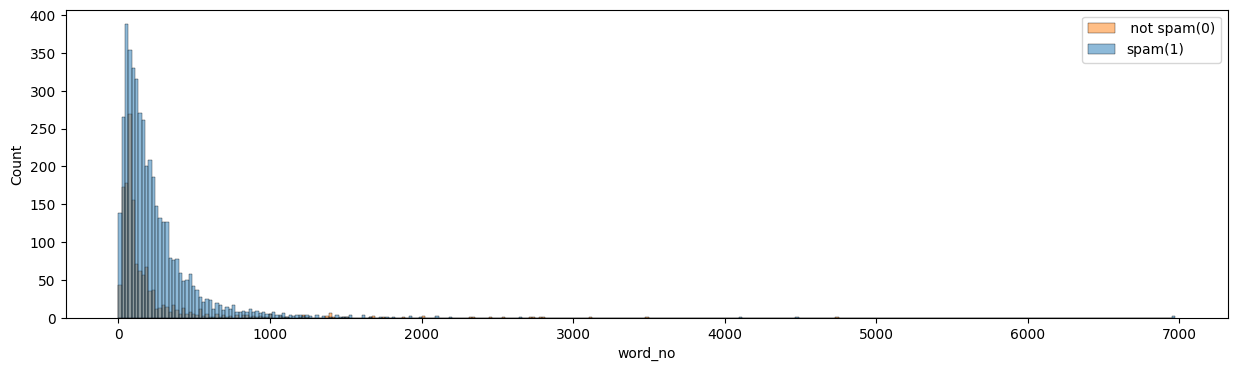

In [201]:
pl.figure(figsize=(15,4))
sn.histplot(data=data,x='word_no',hue='spam')
pl.legend(labels=[' not spam(0)','spam(1)'])
pl.show()

no of words are very high in spam email

In [202]:
data.head(2)

,text,spam,length,sentences,transform,words,word_no
0,Subject: naturally irresistible your corporate...,1,1484,10,naturally irresistible your corporate identit...,"[naturally, irresistible, your, corporate, ide...",187
1,Subject: the stock trading gunslinger fanny i...,1,598,0,the stock trading gunslinger fanny is merril...,"[the, stock, trading, gunslinger, fanny, is, m...",88


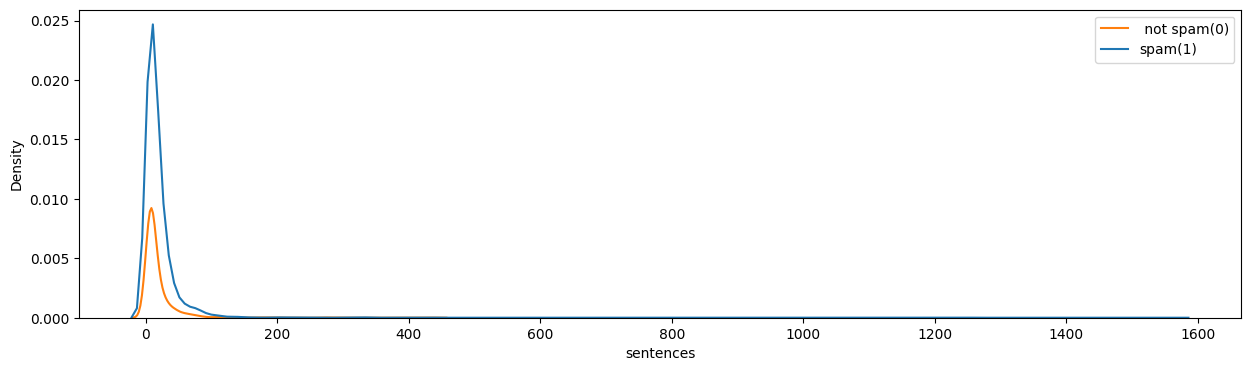

In [203]:
pl.figure(figsize=(15,4))
sn.kdeplot(data=data,x='sentences',hue='spam')
pl.legend(labels=[' not spam(0)','spam(1)'])
pl.show()

no of sentences are high in spam emails.

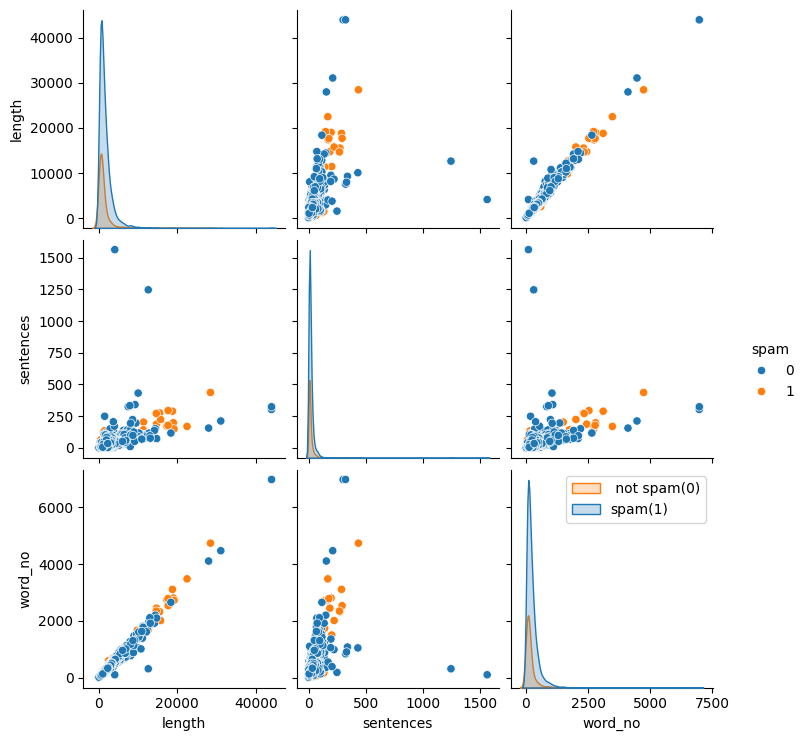

In [204]:
sn.pairplot(data=data,hue='spam')
pl.legend(labels=[' not spam(0)','spam(1)'])
pl.show()

word_no and length both have linear relationshop.

In [205]:
data.head()

,text,spam,length,sentences,transform,words,word_no
0,Subject: naturally irresistible your corporate...,1,1484,10,naturally irresistible your corporate identit...,"[naturally, irresistible, your, corporate, ide...",187
1,Subject: the stock trading gunslinger fanny i...,1,598,0,the stock trading gunslinger fanny is merril...,"[the, stock, trading, gunslinger, fanny, is, m...",88
2,Subject: unbelievable new homes made easy im ...,1,448,3,unbelievable new homes made easy im wanting ...,"[unbelievable, new, homes, made, easy, im, wan...",74
3,Subject: 4 color printing special request add...,1,500,5,color printing special request additional i...,"[color, printing, special, request, additional...",64
4,"Subject: do not have money , get software cds ...",1,235,9,do not have money get software cds from here...,"[do, not, have, money, get, software, cds, fro...",39


In [206]:
num=data[['length','sentences','word_no']]

<Axes: >

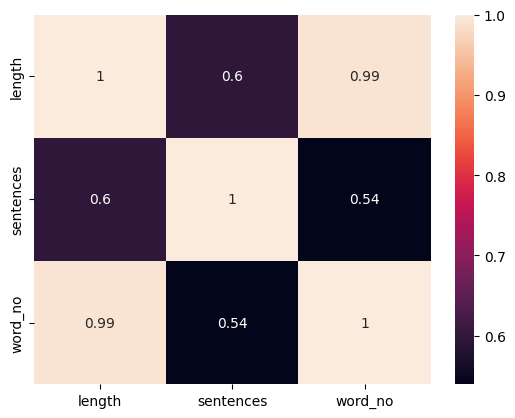

In [207]:
sn.heatmap(num.corr(),annot=True)

In [208]:
nlp = spacy.load("en_core_web_sm")
st=nlp.Defaults.stop_words

In [209]:
def stop_word(text):
    x=text.split()
    b=[ i for i in x if i not in st if len(i) >= 2 and i.isalpha()]
    return " ".join(b)


In [210]:
data['transform']=data['transform'].apply(stop_word)

In [211]:
data.head()

,text,spam,length,sentences,transform,words,word_no
0,Subject: naturally irresistible your corporate...,1,1484,10,naturally irresistible corporate identity lt h...,"[naturally, irresistible, your, corporate, ide...",187
1,Subject: the stock trading gunslinger fanny i...,1,598,0,stock trading gunslinger fanny merrill muzo co...,"[the, stock, trading, gunslinger, fanny, is, m...",88
2,Subject: unbelievable new homes made easy im ...,1,448,3,unbelievable new homes easy im wanting homeown...,"[unbelievable, new, homes, made, easy, im, wan...",74
3,Subject: 4 color printing special request add...,1,500,5,color printing special request additional info...,"[color, printing, special, request, additional...",64
4,"Subject: do not have money , get software cds ...",1,235,9,money software cds software compatibility ain ...,"[do, not, have, money, get, software, cds, fro...",39


In [212]:
def Lemmatize_Text(text):
     doc = nlp(text)
     lemmatized_words = [token.lemma_ for token in doc]
     return ' '.join(lemmatized_words)

In [213]:
data['transform']=data['transform'].apply(Lemmatize_Text)

In [214]:
spam_corpus = []
for msg in data[data['spam'] == 1]['transform'].tolist():  # itrate and collect all text from this colum
    for word in msg.split():
        spam_corpus.append(word)

In [215]:
len(spam_corpus)

142827

In [216]:
from collections import Counter
d=pd.DataFrame(Counter(spam_corpus).most_common(25),columns=['text','frequency'])

In [217]:
d.head()

,text,frequency
0,company,1063
1,com,998
2,business,891
3,email,861
4,information,748


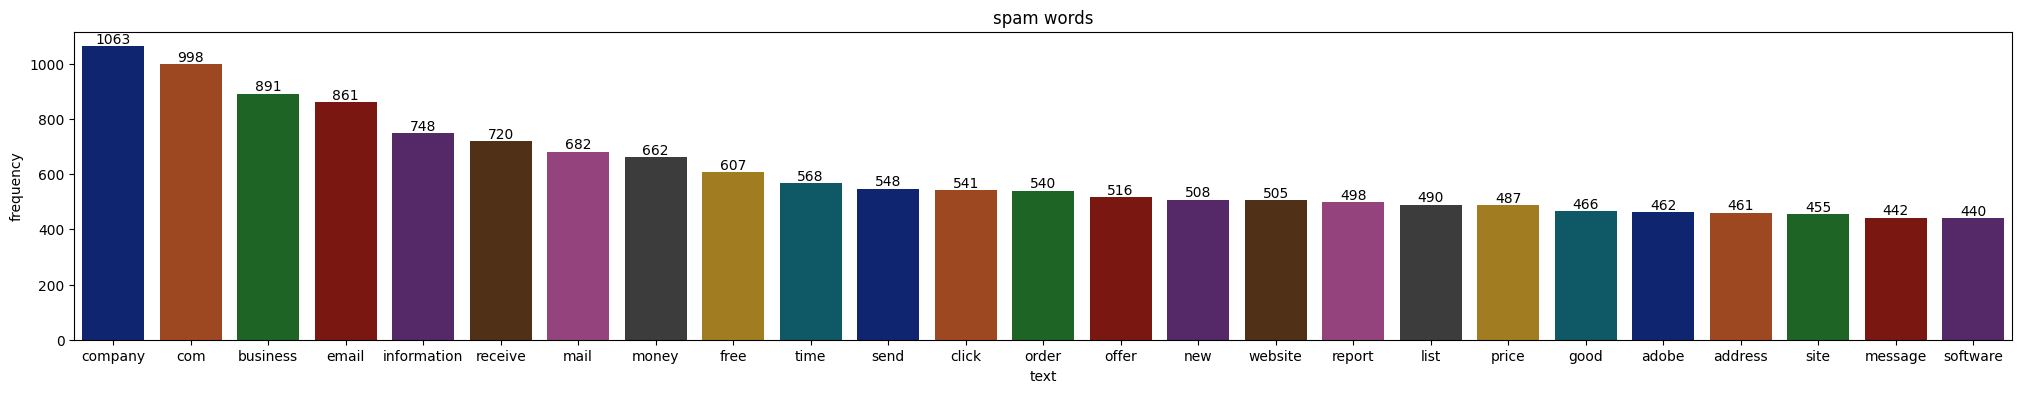

In [218]:
pl.figure(figsize=(25,4))
c=sn.barplot(data=d,x='text',y='frequency',palette='dark')
for i in c.containers:
    c.bar_label(i)
pl.title('spam words')
pl.show()

In [219]:
from wordcloud import WordCloud
wc=WordCloud(height=400,width=800,min_font_size=10,background_color='black',colormap="plasma")

In [220]:
text=' '.join(spam_corpus)

In [221]:
ham_wc = wc.generate(text)

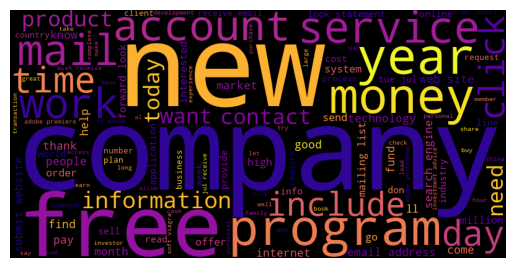

In [222]:
pl.imshow(ham_wc)
pl.axis('off')
pl.show()

In [223]:
not_spam_corpus = []
for msg in data[data['spam'] == 0]['transform'].tolist():  # itrate and collect all text from this colum
    for word in msg.split():
        not_spam_corpus.append(word)

In [224]:
len(not_spam_corpus)

563572

In [225]:
from collections import Counter
d=pd.DataFrame(Counter(not_spam_corpus).most_common(25),columns=['text','frequency'])
d.head()

,text,frequency
0,enron,13335
1,ect,11410
2,vince,8468
3,hou,5567
4,kaminski,4723


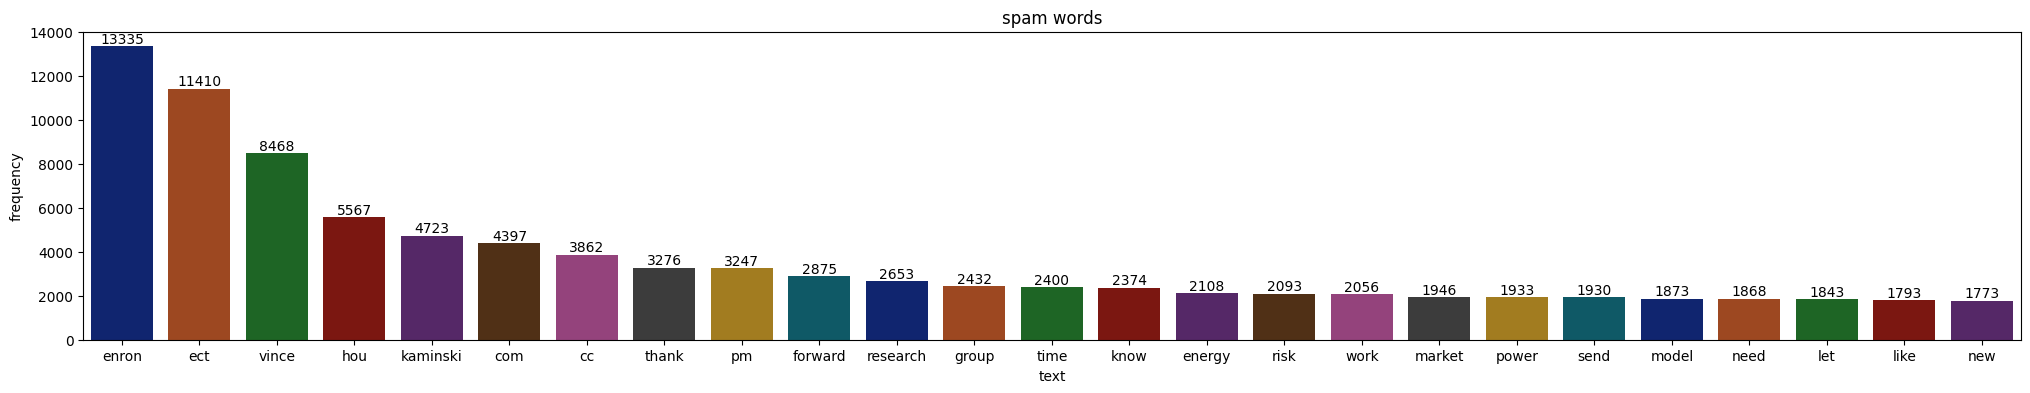

In [226]:
pl.figure(figsize=(25,4))
c=sn.barplot(data=d,x='text',y='frequency',palette='dark')
for i in c.containers:
    c.bar_label(i)
pl.title('spam words')
pl.show()

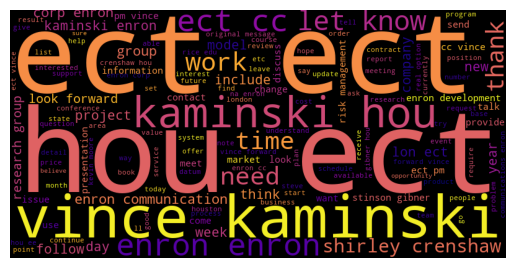

In [227]:
text=' '.join(not_spam_corpus)
ham_wc = wc.generate(text)
pl.imshow(ham_wc)
pl.axis('off')
pl.show()

In [228]:
data.head()

,text,spam,length,sentences,transform,words,word_no
0,Subject: naturally irresistible your corporate...,1,1484,10,naturally irresistible corporate identity lt h...,"[naturally, irresistible, your, corporate, ide...",187
1,Subject: the stock trading gunslinger fanny i...,1,598,0,stock trading gunslinger fanny merrill muzo co...,"[the, stock, trading, gunslinger, fanny, is, m...",88
2,Subject: unbelievable new homes made easy im ...,1,448,3,unbelievable new home easy I m want homeowner ...,"[unbelievable, new, homes, made, easy, im, wan...",74
3,Subject: 4 color printing special request add...,1,500,5,color print special request additional informa...,"[color, printing, special, request, additional...",64
4,"Subject: do not have money , get software cds ...",1,235,9,money software cd software compatibility ain g...,"[do, not, have, money, get, software, cds, fro...",39


In [229]:
data=pd.read_csv('data\emails.csv')

In [230]:
data.drop_duplicates(inplace=True)

In [231]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [232]:
import spacy
import nltk
from nltk import wordpunct_tokenize
nlp = spacy.load("en_core_web_sm")
st=nlp.Defaults.stop_words
import re
import string
e=string.punctuation
def text_pro(text):
    pattern=re.compile(r'<.*?>') #remove html tag
    text=re.sub(pattern,'',text)
    pattern=re.compile('https?\S*') #remove url
    text=re.sub(pattern,'',text)
    for i in e:                   #remove puntuation
      text=text.replace(i,'')
    text=text.lower() #make lower
    text=wordpunct_tokenize(text) #tokenizatio
    list=[]
    for i in text:        # collect only alphabetic 
        if i.isalpha():
           list.append(i)
    text=list[:]
    text=[ i for i in text if i not in st if len(i) >= 2] #stop words
    text=" ".join(text)
    doc = nlp(text)
    text= [token.lemma_ for token in doc] #lematiztion
    text=" ".join(text) 
    list.clear()      
    return text


In [233]:
data['tranform']=data['text'].apply(text_pro)

In [234]:
data.head()

,text,spam,tranform
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new home easy I m want ho...
3,Subject: 4 color printing special request add...,1,subject color print special request additional...
4,"Subject: do not have money , get software cds ...",1,subject money software cd software compatibili...


In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [236]:
tfidf = TfidfVectorizer()

In [237]:
import pickle

In [238]:
x=tfidf.fit_transform(data['tranform']).toarray()

In [239]:
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf, vec_file)

In [240]:
y=data['spam']

In [241]:
x.shape

(5695, 29398)

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=121)

In [244]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB,ComplementNB

In [245]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
cnb=ComplementNB()

In [246]:
cnb.fit(x_train,y_train)
y_pred1 = cnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9543459174714662
[[860   5]
 [ 47 227]]
0.978448275862069


In [247]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9727831431079894
[[856   9]
 [ 22 252]]
0.9655172413793104


In [248]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(bnb, model_file)

In [249]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8964003511852502
[[863   2]
 [116 158]]
0.9875


In [250]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9587357330992098
[[856   9]
 [ 38 236]]
0.963265306122449


In [251]:
n=text_pro('''Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _''')

In [252]:
n

'subject naturally irresistible corporate identity lt hard recollect company market suqgestion information isoverwhelminq good catchy logo stylish statlonery outstanding website task easy promise havinq order iogo company automaticaily world ieader isguite ciear good product effective business organization practicable aim hotat nowadays market promise marketing effort effective list clear benefit creativeness hand original logo specially reflect distinctive company image convenience logo stationery provide format easy use content management system letsyou change website content structure promptness logo draft business day affordability marketing break shouldn gap budget satisfaction guarantee provide unlimited change extra fee surethat love result collaboration look portfolio interested'

In [253]:
with open("vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [254]:
p=vectorizer.transform([n])

In [255]:
v=int(model.predict(p)[0])
if v==0:
    print('not spam')
else:
    print('spam')

spam


In [256]:
from sklearn.linear_model import LogisticRegression
meta_model =LogisticRegression()

In [257]:
from sklearn.ensemble import StackingClassifier,VotingClassifier

In [258]:
estimator=[("bnb",bnb),("gnb",gnb),("mnb",mnb)]

In [259]:
stak=StackingClassifier(estimators=estimator,final_estimator=meta_model,verbose=2)

In [260]:
stak.fit(x_train,y_train)
y_pred1 = stak.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9885864793678666
[[860   5]
 [  8 266]]
0.981549815498155


In [261]:
with open('stak_model.pkl','wb') as file:
    pickle.dump(stak,file)

In [262]:
vt=VotingClassifier(estimators=estimator,voting='soft')

In [263]:
vt.fit(x_train,y_train)
y_pred1 = vt.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9640035118525022
[[863   2]
 [ 39 235]]
0.9915611814345991


In [264]:
vt=VotingClassifier(estimators=estimator,voting='hard')
vt.fit(x_train,y_train)
y_pred1 = vt.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.961369622475856
[[863   2]
 [ 42 232]]
0.9914529914529915


In [265]:
import optuna

In [266]:
def objective(trial):
    # Suggest weights for each model
    weight_gnb = trial.suggest_float("weight_gnb", 0.1, 1.0)
    weight_mnb = trial.suggest_float("weight_mnb", 0.1, 1.0)
    weight_bnb = trial.suggest_float("weight_bnb", 0.1, 1.0)
    mode= trial.suggest_categorical('mode',['soft','hard'])
    vt=VotingClassifier(estimators=estimator,voting=mode,weights=[weight_gnb,weight_bnb,weight_mnb])
    vt.fit(x_train,y_train)
    y_pred1 = vt.predict(x_test)
    qt=accuracy_score(y_test,y_pred1)
    #pr=precision_score(y_test,y_pred1)
    return qt
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)

[I 2024-11-24 07:41:40,863] A new study created in memory with name: no-name-119f9fe8-93a2-44f9-bdf2-8c4f7c5fcf55
[I 2024-11-24 07:41:44,857] Trial 0 finished with value: 0.9648814749780509 and parameters: {'weight_gnb': 0.6703968063256635, 'weight_mnb': 0.23871514265055746, 'weight_bnb': 0.6934245266002576, 'mode': 'soft'}. Best is trial 0 with value: 0.9648814749780509.
[I 2024-11-24 07:41:48,831] Trial 1 finished with value: 0.8964003511852502 and parameters: {'weight_gnb': 0.39129141872872675, 'weight_mnb': 0.9594659200299026, 'weight_bnb': 0.15310388592024224, 'mode': 'hard'}. Best is trial 0 with value: 0.9648814749780509.
[I 2024-11-24 07:41:52,863] Trial 2 finished with value: 0.961369622475856 and parameters: {'weight_gnb': 0.4406622924914454, 'weight_mnb': 0.2409018096170899, 'weight_bnb': 0.4994360455320891, 'mode': 'hard'}. Best is trial 0 with value: 0.9648814749780509.
[I 2024-11-24 07:41:56,865] Trial 3 finished with value: 0.961369622475856 and parameters: {'weight_gnb'

In [267]:
study.best_value

0.9754170324846356

In [268]:
study.best_params

{'weight_gnb': 0.9994980013538991,
 'weight_mnb': 0.5114723255563121,
 'weight_bnb': 0.5199839178201257,
 'mode': 'soft'}

In [ ]:
with open("stak_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [269]:
import flask
   
from flask import Flask,request,render_template
app=Flask(__name__,template_folder="template")
@app.route('/')
def home_page():
    return render_template("index.html")
@app.route('/predict',methods=["POST"])
def pred_page():
    data=str(request.form.get('email'))
    data=text_pro(data)
    z=vectorizer.transform([data])
    v=int(model.predict(z)[0])
    if v==0:
     x='not spam'
    else:
     x='spam'
    return render_template("result.html",x=x)

if __name__=="__main__":
 app.run(host='0.0.0.0')



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.29.150:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Nov/2024 07:45:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2024 07:45:40] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2024 07:45:58] "POST /predict HTTP/1.1" 200 -
